In [18]:
import gzip
import gensim 
import logging
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Word embeddings are a type of representation used in natural language processing (NLP) that allows words to be represented as dense vectors in a high-dimensional space. These vectors capture semantic and syntactic information about the words they represent, allowing NLP models to better understand the meaning of language.

Word2vec is a popular algorithm for training word embeddings. It works by analyzing the co-occurrence patterns of words in a large corpus of text, and learning to predict which words are likely to appear near each other.

### 1. In this part of the assignment, you will walk through a tutorial Links to an external site. for generating word embeddings for a car and hotel reviews dataset (compiled from TripAdvisor and Edmunds). You will replicate the process to answer the following questions about the IMDB Movie Reviews dataset, which includes text from 50k reviews. Please include your code from walking through the tutorial. You don’t need to make any changes here, but make sure to understand the reasoning behind each step. Here’s Links to an external site. another (optional) good resource on understanding the intuition behind Word2vec.

In [2]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [3]:
### load data set
with open('reviews_data.txt' , 'rb') as f:
    for i in f:
        print(i)
        break

b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in Be

### Read text information

In [4]:
def read_input(input_file):
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with open(input_file, 'rb') as f:
        for index , log in enumerate(f): 
            
            if(index % 10000 == 0):
                logging.info ("read {0} reviews".format(index))

            yield gensim.utils.simple_preprocess (log)    

In [5]:
documents = list(read_input('reviews_data.txt'))

2023-03-13 19:50:57,523 : INFO : reading file reviews_data.txt...this may take a while
2023-03-13 19:50:57,525 : INFO : read 0 reviews
2023-03-13 19:50:59,373 : INFO : read 10000 reviews
2023-03-13 19:51:01,398 : INFO : read 20000 reviews
2023-03-13 19:51:04,107 : INFO : read 30000 reviews
2023-03-13 19:51:06,150 : INFO : read 40000 reviews
2023-03-13 19:51:08,578 : INFO : read 50000 reviews
2023-03-13 19:51:10,698 : INFO : read 60000 reviews
2023-03-13 19:51:12,542 : INFO : read 70000 reviews
2023-03-13 19:51:14,299 : INFO : read 80000 reviews
2023-03-13 19:51:16,063 : INFO : read 90000 reviews
2023-03-13 19:51:17,744 : INFO : read 100000 reviews
2023-03-13 19:51:19,440 : INFO : read 110000 reviews
2023-03-13 19:51:21,228 : INFO : read 120000 reviews
2023-03-13 19:51:23,037 : INFO : read 130000 reviews
2023-03-13 19:51:25,359 : INFO : read 140000 reviews
2023-03-13 19:51:27,034 : INFO : read 150000 reviews
2023-03-13 19:51:28,765 : INFO : read 160000 reviews
2023-03-13 19:51:30,576 : 

### Train the W2V model

In [6]:
model = gensim.models.Word2Vec(documents, vector_size = 150, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)

2023-03-13 19:51:49,689 : INFO : collecting all words and their counts
2023-03-13 19:51:49,691 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 19:51:49,934 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2023-03-13 19:51:50,187 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2023-03-13 19:51:50,520 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2023-03-13 19:51:50,797 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2023-03-13 19:51:51,095 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2023-03-13 19:51:51,383 : INFO : PROGRESS: at sentence #60000, processed 11013727 words, keeping 76787 word types
2023-03-13 19:51:51,647 : INFO : PROGRESS: at sentence #70000, processed 12637529 words, keeping 83200 word types
2023-03-13 19:51:51,878 : INFO : PROG

2023-03-13 19:52:22,408 : INFO : EPOCH 1 - PROGRESS: at 8.81% examples, 1354646 words/s, in_qsize 20, out_qsize 2
2023-03-13 19:52:23,422 : INFO : EPOCH 1 - PROGRESS: at 12.48% examples, 1361427 words/s, in_qsize 17, out_qsize 2
2023-03-13 19:52:24,425 : INFO : EPOCH 1 - PROGRESS: at 16.60% examples, 1371481 words/s, in_qsize 18, out_qsize 1
2023-03-13 19:52:25,437 : INFO : EPOCH 1 - PROGRESS: at 20.18% examples, 1365227 words/s, in_qsize 17, out_qsize 2
2023-03-13 19:52:26,445 : INFO : EPOCH 1 - PROGRESS: at 23.96% examples, 1362260 words/s, in_qsize 20, out_qsize 2
2023-03-13 19:52:27,456 : INFO : EPOCH 1 - PROGRESS: at 28.92% examples, 1365477 words/s, in_qsize 19, out_qsize 0
2023-03-13 19:52:28,466 : INFO : EPOCH 1 - PROGRESS: at 33.73% examples, 1364387 words/s, in_qsize 16, out_qsize 3
2023-03-13 19:52:29,474 : INFO : EPOCH 1 - PROGRESS: at 38.48% examples, 1361300 words/s, in_qsize 19, out_qsize 1
2023-03-13 19:52:30,479 : INFO : EPOCH 1 - PROGRESS: at 43.24% examples, 1356427 

2023-03-13 19:53:32,200 : INFO : EPOCH 4 - PROGRESS: at 8.93% examples, 1374532 words/s, in_qsize 19, out_qsize 0
2023-03-13 19:53:33,200 : INFO : EPOCH 4 - PROGRESS: at 12.55% examples, 1371437 words/s, in_qsize 18, out_qsize 2
2023-03-13 19:53:34,202 : INFO : EPOCH 4 - PROGRESS: at 16.68% examples, 1381206 words/s, in_qsize 19, out_qsize 0
2023-03-13 19:53:35,205 : INFO : EPOCH 4 - PROGRESS: at 20.36% examples, 1382338 words/s, in_qsize 18, out_qsize 1
2023-03-13 19:53:36,216 : INFO : EPOCH 4 - PROGRESS: at 24.27% examples, 1382817 words/s, in_qsize 17, out_qsize 2
2023-03-13 19:53:37,219 : INFO : EPOCH 4 - PROGRESS: at 29.38% examples, 1388632 words/s, in_qsize 18, out_qsize 1
2023-03-13 19:53:38,223 : INFO : EPOCH 4 - PROGRESS: at 34.30% examples, 1388442 words/s, in_qsize 19, out_qsize 0
2023-03-13 19:53:39,224 : INFO : EPOCH 4 - PROGRESS: at 39.24% examples, 1389471 words/s, in_qsize 16, out_qsize 3
2023-03-13 19:53:40,230 : INFO : EPOCH 4 - PROGRESS: at 44.31% examples, 1389503 

2023-03-13 19:54:32,955 : INFO : EPOCH 1 - PROGRESS: at 85.06% examples, 1362662 words/s, in_qsize 17, out_qsize 2
2023-03-13 19:54:33,956 : INFO : EPOCH 1 - PROGRESS: at 89.91% examples, 1362708 words/s, in_qsize 20, out_qsize 0
2023-03-13 19:54:34,957 : INFO : EPOCH 1 - PROGRESS: at 94.69% examples, 1364107 words/s, in_qsize 17, out_qsize 2
2023-03-13 19:54:35,961 : INFO : EPOCH 1 - PROGRESS: at 99.53% examples, 1365783 words/s, in_qsize 15, out_qsize 3
2023-03-13 19:54:36,044 : INFO : EPOCH 1: training on 41519359 raw words (30351575 effective words) took 22.2s, 1366304 effective words/s
2023-03-13 19:54:37,054 : INFO : EPOCH 2 - PROGRESS: at 4.46% examples, 1375373 words/s, in_qsize 18, out_qsize 1
2023-03-13 19:54:38,068 : INFO : EPOCH 2 - PROGRESS: at 8.97% examples, 1386803 words/s, in_qsize 18, out_qsize 2
2023-03-13 19:54:39,082 : INFO : EPOCH 2 - PROGRESS: at 12.70% examples, 1387496 words/s, in_qsize 19, out_qsize 0
2023-03-13 19:54:40,086 : INFO : EPOCH 2 - PROGRESS: at 16.

2023-03-13 19:55:42,617 : INFO : EPOCH 5 - PROGRESS: at 4.35% examples, 1341339 words/s, in_qsize 17, out_qsize 2
2023-03-13 19:55:43,638 : INFO : EPOCH 5 - PROGRESS: at 8.89% examples, 1368760 words/s, in_qsize 17, out_qsize 2
2023-03-13 19:55:44,643 : INFO : EPOCH 5 - PROGRESS: at 12.64% examples, 1379851 words/s, in_qsize 17, out_qsize 2
2023-03-13 19:55:45,660 : INFO : EPOCH 5 - PROGRESS: at 16.64% examples, 1371460 words/s, in_qsize 16, out_qsize 3
2023-03-13 19:55:46,661 : INFO : EPOCH 5 - PROGRESS: at 20.32% examples, 1375436 words/s, in_qsize 19, out_qsize 0
2023-03-13 19:55:47,663 : INFO : EPOCH 5 - PROGRESS: at 24.27% examples, 1381193 words/s, in_qsize 17, out_qsize 2
2023-03-13 19:55:48,666 : INFO : EPOCH 5 - PROGRESS: at 29.17% examples, 1378176 words/s, in_qsize 18, out_qsize 1
2023-03-13 19:55:49,670 : INFO : EPOCH 5 - PROGRESS: at 33.98% examples, 1377464 words/s, in_qsize 20, out_qsize 1
2023-03-13 19:55:50,676 : INFO : EPOCH 5 - PROGRESS: at 38.77% examples, 1373504 w

2023-03-13 19:56:53,697 : INFO : EPOCH 8 - PROGRESS: at 24.33% examples, 1388200 words/s, in_qsize 16, out_qsize 3
2023-03-13 19:56:54,709 : INFO : EPOCH 8 - PROGRESS: at 29.50% examples, 1393766 words/s, in_qsize 19, out_qsize 0
2023-03-13 19:56:55,716 : INFO : EPOCH 8 - PROGRESS: at 34.43% examples, 1392443 words/s, in_qsize 19, out_qsize 0
2023-03-13 19:56:56,728 : INFO : EPOCH 8 - PROGRESS: at 39.01% examples, 1380118 words/s, in_qsize 18, out_qsize 1
2023-03-13 19:56:57,731 : INFO : EPOCH 8 - PROGRESS: at 43.96% examples, 1378783 words/s, in_qsize 19, out_qsize 0
2023-03-13 19:56:58,732 : INFO : EPOCH 8 - PROGRESS: at 48.83% examples, 1379009 words/s, in_qsize 19, out_qsize 0
2023-03-13 19:56:59,734 : INFO : EPOCH 8 - PROGRESS: at 53.56% examples, 1382418 words/s, in_qsize 19, out_qsize 0
2023-03-13 19:57:00,747 : INFO : EPOCH 8 - PROGRESS: at 58.46% examples, 1382624 words/s, in_qsize 19, out_qsize 0
2023-03-13 19:57:01,752 : INFO : EPOCH 8 - PROGRESS: at 63.23% examples, 1381110

(303494862, 415193590)

In [7]:
w1 = 'dirty'
model.wv.most_similar(positive = w1)

[('filthy', 0.8695250153541565),
 ('stained', 0.7735795378684998),
 ('dusty', 0.759697675704956),
 ('smelly', 0.756308913230896),
 ('unclean', 0.7550876140594482),
 ('grubby', 0.752247154712677),
 ('soiled', 0.7274388074874878),
 ('disgusting', 0.7217460870742798),
 ('dingy', 0.7206948399543762),
 ('mouldy', 0.7176271677017212)]

In [8]:
### look up top 6 words similar to 'polite'
w1 = ["polite"]
model.wv.most_similar (positive=w1,topn=6)

[('courteous', 0.9203314185142517),
 ('friendly', 0.8302329182624817),
 ('cordial', 0.7964412569999695),
 ('attentive', 0.784281849861145),
 ('professional', 0.7819965481758118),
 ('curteous', 0.7677022814750671)]

In [9]:
### look up top 6 words similar to 'france'
w1 = ["france"]
model.wv.most_similar (positive=w1,topn=6)

[('canada', 0.6833469271659851),
 ('spain', 0.6572585701942444),
 ('thailand', 0.6521244645118713),
 ('germany', 0.6518812775611877),
 ('greece', 0.6283648610115051),
 ('england', 0.6279587745666504)]

In [10]:
### look up top 6 words similar to 'shocked'
w1 = ["shocked"]
model.wv.most_similar (positive=w1,topn=6)

[('horrified', 0.8171570301055908),
 ('amazed', 0.7879093289375305),
 ('astonished', 0.7631496787071228),
 ('dismayed', 0.7622467279434204),
 ('appalled', 0.7545190453529358),
 ('stunned', 0.7534666061401367)]

In [11]:
### get everything related to stuff on the bed
w1 = ["bed",'sheet','pillow']
w2 = ['couch']
model.wv.most_similar (positive=w1,negative=w2,topn=10)

[('duvet', 0.7191154360771179),
 ('mattress', 0.7055922150611877),
 ('quilt', 0.6977694034576416),
 ('blanket', 0.6902884840965271),
 ('matress', 0.6785698533058167),
 ('pillowcase', 0.6579835414886475),
 ('foam', 0.6402665972709656),
 ('sheets', 0.6354100108146667),
 ('pillows', 0.6348655819892883),
 ('pillowcases', 0.6170545816421509)]

In [12]:
### similarity between two different words
model.wv.similarity(w1="dirty",w2="smelly")

0.7563089

In [13]:
### similarity between two identical words
model.wv.similarity(w1="dirty",w2="dirty")

1.0

In [14]:
### similarity between two unrelated words
model.wv.similarity(w1="dirty",w2="clean")

0.25077185

In [15]:
### Which one is the odd one out in this list?
model.wv.doesnt_match(["cat","dog","france"])

'france'

In [16]:
### Which one is the odd one out in this list?
model.wv.doesnt_match(["bed","pillow","duvet","shower"])

'shower'

### 2. Pivoting to the IMDB Movie Reviews dataset Download IMDB Movie Reviews dataset, extract the reviews – what preprocessing techniques might you need to apply before the text can be ingested by word2vec? Split the data into training and test sets (80%-20% ratio suggested).

In [19]:
### read dataset
imdb = pd.read_csv("IMDB Dataset.csv")

In [20]:
imdb.head(n = 10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


We have to 
1. take care the "< br/ >"
2. convert "positive" + "negatives" to [0 , 1]
3. separate words
4. remove punctuations

In [21]:
def pre_process(df):
    df['review'] = df['review'].apply(lambda x : re.sub("<br />" , "" , x))
    reviews = df['review']
    reviews = [word.replace(",","").replace(".","").replace("'","").lower().split(' ') for word in reviews]
    
    df['sentiment'] = df['sentiment'].apply(lambda x : 1 if x == 'positive' else 0)
    sentiment = df['sentiment']
    return reviews, sentiment

In [22]:
imdb_sub = imdb.copy()
train , test = pre_process(imdb_sub)

### W2V model

Split data into train and test

In [23]:
x_train , x_test , y_train , y_test = train_test_split(train , test , train_size = 0.8 , random_state = 0)

## 3. The Word2vec module is available directly in Python from the library gensim. Notice that there are several parameters you can customize (size, window, min_count, sg). By default, size (defining the output vector dimensions) is set to 100, window to 5, min_count to 5, and sg to 0 (i.e. continuous bag of words). After developing your embeddings, you will use them as an input into downstream models – in this case, logistic regression for all subparts – for sentiment analysis. Make sure to use sg = 1 (specifying skip-gram) for all models in this assignment.

### 1. Maintaining the default parameters (except sg = 1), generate word embeddings of dimension 100. For each review, average the embedding vectors for each word to create an overall vector representing its text. Now, run logistic regression to classify each review. What are your train and test accuracies? Are they appropriate measures for model quality in this case?

#### Mdoel

In [24]:
model = gensim.models.Word2Vec(x_train,
                                sg = 1)
model.train(x_train,
            total_examples=len(x_train),
            epochs = 10)

2023-03-13 19:58:00,921 : INFO : collecting all words and their counts
2023-03-13 19:58:00,923 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 19:58:01,331 : INFO : PROGRESS: at sentence #10000, processed 2265451 words, keeping 110850 word types
2023-03-13 19:58:01,723 : INFO : PROGRESS: at sentence #20000, processed 4523323 words, keeping 172403 word types
2023-03-13 19:58:02,166 : INFO : PROGRESS: at sentence #30000, processed 6807809 words, keeping 225435 word types
2023-03-13 19:58:02,598 : INFO : collected 272065 word types from a corpus of 9065729 raw words and 40000 sentences
2023-03-13 19:58:02,599 : INFO : Creating a fresh vocabulary
2023-03-13 19:58:02,882 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 46345 unique words (17.03% of original 272065, drops 225720)', 'datetime': '2023-03-13T19:58:02.881960', 'gensim': '4.3.0', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]',

2023-03-13 19:58:51,004 : INFO : EPOCH 2 - PROGRESS: at 92.05% examples, 402019 words/s, in_qsize 5, out_qsize 0
2023-03-13 19:58:52,014 : INFO : EPOCH 2 - PROGRESS: at 98.27% examples, 402259 words/s, in_qsize 6, out_qsize 0
2023-03-13 19:58:52,281 : INFO : EPOCH 2: training on 9065729 raw words (6605716 effective words) took 16.4s, 402565 effective words/s
2023-03-13 19:58:53,293 : INFO : EPOCH 3 - PROGRESS: at 5.91% examples, 390218 words/s, in_qsize 5, out_qsize 0
2023-03-13 19:58:54,300 : INFO : EPOCH 3 - PROGRESS: at 11.98% examples, 397412 words/s, in_qsize 5, out_qsize 0
2023-03-13 19:58:55,309 : INFO : EPOCH 3 - PROGRESS: at 18.23% examples, 399944 words/s, in_qsize 5, out_qsize 0
2023-03-13 19:58:56,324 : INFO : EPOCH 3 - PROGRESS: at 24.50% examples, 400431 words/s, in_qsize 5, out_qsize 0
2023-03-13 19:58:57,348 : INFO : EPOCH 3 - PROGRESS: at 30.70% examples, 400035 words/s, in_qsize 5, out_qsize 0
2023-03-13 19:58:58,360 : INFO : EPOCH 3 - PROGRESS: at 36.92% examples, 40

2023-03-13 19:59:50,650 : INFO : EPOCH 1 - PROGRESS: at 49.25% examples, 401888 words/s, in_qsize 6, out_qsize 0
2023-03-13 19:59:51,655 : INFO : EPOCH 1 - PROGRESS: at 55.40% examples, 401674 words/s, in_qsize 5, out_qsize 0
2023-03-13 19:59:52,673 : INFO : EPOCH 1 - PROGRESS: at 61.42% examples, 401506 words/s, in_qsize 5, out_qsize 0
2023-03-13 19:59:53,700 : INFO : EPOCH 1 - PROGRESS: at 67.58% examples, 401084 words/s, in_qsize 5, out_qsize 0
2023-03-13 19:59:54,705 : INFO : EPOCH 1 - PROGRESS: at 73.79% examples, 402053 words/s, in_qsize 6, out_qsize 0
2023-03-13 19:59:55,725 : INFO : EPOCH 1 - PROGRESS: at 80.14% examples, 402936 words/s, in_qsize 5, out_qsize 0
2023-03-13 19:59:56,732 : INFO : EPOCH 1 - PROGRESS: at 86.43% examples, 403683 words/s, in_qsize 5, out_qsize 0
2023-03-13 19:59:57,740 : INFO : EPOCH 1 - PROGRESS: at 92.68% examples, 403761 words/s, in_qsize 5, out_qsize 0
2023-03-13 19:59:58,744 : INFO : EPOCH 1 - PROGRESS: at 98.79% examples, 403611 words/s, in_qsiz

2023-03-13 20:01:00,049 : INFO : EPOCH 5 - PROGRESS: at 74.08% examples, 402522 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:01:01,087 : INFO : EPOCH 5 - PROGRESS: at 80.55% examples, 403417 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:01:02,092 : INFO : EPOCH 5 - PROGRESS: at 86.86% examples, 404180 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:01:03,102 : INFO : EPOCH 5 - PROGRESS: at 93.11% examples, 404123 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:01:04,116 : INFO : EPOCH 5 - PROGRESS: at 99.34% examples, 404172 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:01:04,203 : INFO : EPOCH 5: training on 9065729 raw words (6604784 effective words) took 16.3s, 404478 effective words/s
2023-03-13 20:01:05,212 : INFO : EPOCH 6 - PROGRESS: at 5.91% examples, 392682 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:01:06,235 : INFO : EPOCH 6 - PROGRESS: at 12.10% examples, 399214 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:01:07,246 : INFO : EPOCH 6 - PROGRESS: at 18.34% examples, 40

2023-03-13 20:02:09,318 : INFO : EPOCH 9 - PROGRESS: at 99.03% examples, 403620 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:02:09,456 : INFO : EPOCH 9: training on 9065729 raw words (6605539 effective words) took 16.4s, 404008 effective words/s
2023-03-13 20:02:09,457 : INFO : Word2Vec lifecycle event {'msg': 'training on 90657290 raw words (66054780 effective words) took 164.1s, 402586 effective words/s', 'datetime': '2023-03-13T20:02:09.457381', 'gensim': '4.3.0', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-13.2.1-x86_64-i386-64bit', 'event': 'train'}


(66054780, 90657290)

#### Get mean vectors

In [25]:
def calculate_mean_vector(model , string):
    all_word_vectors = []
    for word in string:
        try:
            all_word_vectors.append(model.wv[word])
        except:
            pass

    return np.mean(all_word_vectors , axis = 0)

In [26]:
train_mean_vectors = [calculate_mean_vector(model , reviews) for reviews in x_train]
test_mean_vectors = [calculate_mean_vector(model , reviews) for reviews in x_test]

#### Run logistic regression

In [27]:
### logistic regression
logic_model = LogisticRegression(random_state=0)

logic_model.fit(train_mean_vectors , y_train)

/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

#### Predict with logistic regression

In [28]:
logic_result = logic_model.predict(test_mean_vectors)

#### Calculate accuracy with : if predicted_y == y

In [30]:
counter = 0
for i in range(len(logic_result)):
    if int(logic_result[i]) == y_test.iloc[i]:
        counter = counter + 1
        
accuracy = counter / len(logic_result)

#### Test dataset accuracy

In [31]:
accuracy

0.8687

### Write all processes into functions

---

In [33]:
### function for accuracy calculation
def calculate_acy(logic_result, y_test):
    counter = 0
    for i in range(len(logic_result)):
        if int(logic_result[i]) == y_test.iloc[i]:
            counter = counter + 1
    
    accuracy = counter / len(y_test)
    
    return accuracy

In [53]:
### train models and validate using accuracy function
def w2v_training_and_validate(v_size , window , x_train , x_test , y_train, y_test):
    if v_size == "default" : v_size = 100
    if window == "default" : window = 5
    
    temp_model = gensim.models.Word2Vec(x_train,
                                        window = window,
                                        vector_size = v_size,
                                        sg = 1)
    temp_model.train(x_train,
                     total_examples = len(x_train),
                     epochs = 5)
    
    ### get mean vectors 
    train_mean_vectors = [calculate_mean_vector(temp_model , reviews) for reviews in x_train]
    test_mean_vectors = [calculate_mean_vector(temp_model , reviews) for reviews in x_test]
    
    ### logistic regression
    logic_model = LogisticRegression(random_state = 0)
    logic_model.fit(train_mean_vectors , y_train)
    
    ### predict with logistic model
    logic_result = logic_model.predict(test_mean_vectors)
    
    accy = float(calculate_acy(logic_result , y_test)) * 100
        
    return [v_size , window , accy]
    

In [35]:
def draw_plot(window_or_vec_size , accys):
    ylabel = ""
    if window_or_vec_size == "window":
        ylabel = "Window Size"
        xs = [x[1] for x in accys] 
    else:
        ylabel = "Vector Size"
        xs = [x[0] for x in accys]
    
    ys = [x[2] for x in accys]
    
    plt.plot(xs,
             ys)
    
    plt.ylabel("Accuracy (%)") 
    plt.xlabel(ylabel)
    plt.show()

### 2. Maintaining all other parameters as defaults, vary size between [25, 50, 100, 150]. Plot size vs. train and test accuracy. Briefly comment on how changing this parameter impacts model performance, intuitively as well as specifically for this dataset.

In [59]:
size = [25, 50, 100, 150]
acy_list_2 = []

for s in size:
    acy_list_2.append(w2v_training_and_validate(s,
                                                "default",
                                                 x_train,
                                                 x_test,
                                                 y_train,
                                                 y_test))

2023-03-13 20:16:13,130 : INFO : collecting all words and their counts
2023-03-13 20:16:13,132 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 20:16:13,535 : INFO : PROGRESS: at sentence #10000, processed 2265451 words, keeping 110850 word types
2023-03-13 20:16:13,937 : INFO : PROGRESS: at sentence #20000, processed 4523323 words, keeping 172403 word types
2023-03-13 20:16:14,319 : INFO : PROGRESS: at sentence #30000, processed 6807809 words, keeping 225435 word types
2023-03-13 20:16:14,731 : INFO : collected 272065 word types from a corpus of 9065729 raw words and 40000 sentences
2023-03-13 20:16:14,732 : INFO : Creating a fresh vocabulary
2023-03-13 20:16:15,029 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 46345 unique words (17.03% of original 272065, drops 225720)', 'datetime': '2023-03-13T20:16:15.029597', 'gensim': '4.3.0', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]',

2023-03-13 20:17:02,479 : INFO : EPOCH 3 - PROGRESS: at 12.84% examples, 428841 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:17:03,499 : INFO : EPOCH 3 - PROGRESS: at 19.57% examples, 428916 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:17:04,534 : INFO : EPOCH 3 - PROGRESS: at 26.50% examples, 430454 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:17:05,539 : INFO : EPOCH 3 - PROGRESS: at 33.08% examples, 431327 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:17:06,543 : INFO : EPOCH 3 - PROGRESS: at 39.77% examples, 432578 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:17:07,550 : INFO : EPOCH 3 - PROGRESS: at 46.37% examples, 432868 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:17:08,565 : INFO : EPOCH 3 - PROGRESS: at 53.18% examples, 433514 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:17:09,567 : INFO : EPOCH 3 - PROGRESS: at 59.83% examples, 434424 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:17:10,595 : INFO : EPOCH 3 - PROGRESS: at 66.53% examples, 434180 words/s, in_qsiz

2023-03-13 20:18:04,047 : INFO : EPOCH 2 - PROGRESS: at 20.41% examples, 446669 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:18:05,076 : INFO : EPOCH 2 - PROGRESS: at 27.45% examples, 446152 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:18:06,099 : INFO : EPOCH 2 - PROGRESS: at 34.35% examples, 445214 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:18:07,136 : INFO : EPOCH 2 - PROGRESS: at 41.03% examples, 442973 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:18:08,145 : INFO : EPOCH 2 - PROGRESS: at 47.73% examples, 441774 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:18:09,157 : INFO : EPOCH 2 - PROGRESS: at 54.53% examples, 441388 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:18:10,166 : INFO : EPOCH 2 - PROGRESS: at 61.24% examples, 441912 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:18:11,188 : INFO : EPOCH 2 - PROGRESS: at 68.14% examples, 442480 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:18:12,192 : INFO : EPOCH 2 - PROGRESS: at 75.08% examples, 444243 words/s, in_qsiz

2023-03-13 20:19:06,552 : INFO : Word2Vec lifecycle event {'msg': 'training model with 3 workers on 46345 vocabulary and 50 features, using sg=1 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2023-03-13T20:19:06.552784', 'gensim': '4.3.0', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-13.2.1-x86_64-i386-64bit', 'event': 'train'}
2023-03-13 20:19:07,562 : INFO : EPOCH 0 - PROGRESS: at 6.88% examples, 457958 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:19:08,565 : INFO : EPOCH 0 - PROGRESS: at 13.93% examples, 463760 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:19:09,597 : INFO : EPOCH 0 - PROGRESS: at 21.29% examples, 464189 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:19:10,601 : INFO : EPOCH 0 - PROGRESS: at 28.48% examples, 465550 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:19:11,614 : INFO : EPOCH 0 - PROGRESS: at 35.77% examples, 465661 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:1

2023-03-13 20:20:16,238 : INFO : EPOCH 4 - PROGRESS: at 68.24% examples, 444060 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:20:17,268 : INFO : EPOCH 4 - PROGRESS: at 75.19% examples, 444616 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:20:18,274 : INFO : EPOCH 4 - PROGRESS: at 82.01% examples, 445033 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:20:19,296 : INFO : EPOCH 4 - PROGRESS: at 88.90% examples, 444758 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:20:20,316 : INFO : EPOCH 4 - PROGRESS: at 95.71% examples, 444611 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:20:20,924 : INFO : EPOCH 4: training on 9065729 raw words (6605739 effective words) took 14.8s, 445107 effective words/s
2023-03-13 20:20:20,925 : INFO : Word2Vec lifecycle event {'msg': 'training on 45328645 raw words (33023960 effective words) took 74.4s, 444041 effective words/s', 'datetime': '2023-03-13T20:20:20.925697', 'gensim': '4.3.0', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-14

2023-03-13 20:21:16,789 : INFO : EPOCH 3 - PROGRESS: at 74.97% examples, 445332 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:21:17,794 : INFO : EPOCH 3 - PROGRESS: at 81.66% examples, 445119 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:21:18,808 : INFO : EPOCH 3 - PROGRESS: at 88.53% examples, 445128 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:21:19,809 : INFO : EPOCH 3 - PROGRESS: at 95.28% examples, 445021 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:21:20,494 : INFO : EPOCH 3: training on 9065729 raw words (6605171 effective words) took 14.8s, 445172 effective words/s
2023-03-13 20:21:21,501 : INFO : EPOCH 4 - PROGRESS: at 6.33% examples, 422606 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:21:22,514 : INFO : EPOCH 4 - PROGRESS: at 12.96% examples, 429963 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:21:23,528 : INFO : EPOCH 4 - PROGRESS: at 19.89% examples, 435197 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:21:24,542 : INFO : EPOCH 4 - PROGRESS: at 26.85% examples, 43

2023-03-13 20:22:16,924 : INFO : EPOCH 1 - PROGRESS: at 33.67% examples, 437510 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:22:17,944 : INFO : EPOCH 1 - PROGRESS: at 40.37% examples, 437878 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:22:18,951 : INFO : EPOCH 1 - PROGRESS: at 47.15% examples, 438372 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:22:19,952 : INFO : EPOCH 1 - PROGRESS: at 53.83% examples, 438179 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:22:20,969 : INFO : EPOCH 1 - PROGRESS: at 60.45% examples, 437880 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:22:21,975 : INFO : EPOCH 1 - PROGRESS: at 67.16% examples, 438135 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:22:22,976 : INFO : EPOCH 1 - PROGRESS: at 73.79% examples, 438533 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:22:23,993 : INFO : EPOCH 1 - PROGRESS: at 80.44% examples, 438343 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:22:24,996 : INFO : EPOCH 1 - PROGRESS: at 87.19% examples, 438783 words/s, in_qsiz

2023-03-13 20:23:17,542 : INFO : EPOCH 0 - PROGRESS: at 34.02% examples, 436407 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:23:18,569 : INFO : EPOCH 0 - PROGRESS: at 40.70% examples, 436446 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:23:19,599 : INFO : EPOCH 0 - PROGRESS: at 47.62% examples, 436874 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:23:20,600 : INFO : EPOCH 0 - PROGRESS: at 54.39% examples, 437712 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:23:21,618 : INFO : EPOCH 0 - PROGRESS: at 61.02% examples, 437508 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:23:22,620 : INFO : EPOCH 0 - PROGRESS: at 67.69% examples, 437968 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:23:23,622 : INFO : EPOCH 0 - PROGRESS: at 74.20% examples, 437694 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:23:24,629 : INFO : EPOCH 0 - PROGRESS: at 80.89% examples, 437937 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:23:25,630 : INFO : EPOCH 0 - PROGRESS: at 87.64% examples, 438468 words/s, in_qsiz

/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2023-03-13 20:24:47,783 : INFO : collecting all words and their counts
2023-03-13 20:24:47,783 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 20:24:48,132 : INFO : PROGRESS: at sentence #10000, processed 2265451 words, keeping 110850 word types
2023-03-13 20:24:48,485 : INFO : PROGRESS: at sentence #20000, processed 4523323 words, keeping 172403 word types
2023-03-13 20:24:48,851 : INFO : PROGRESS: at sentence #30000, processed 6807809 words, keeping 2

2023-03-13 20:25:32,879 : INFO : EPOCH 2 - PROGRESS: at 15.53% examples, 344308 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:25:33,881 : INFO : EPOCH 2 - PROGRESS: at 20.94% examples, 345674 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:25:34,884 : INFO : EPOCH 2 - PROGRESS: at 26.28% examples, 345095 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:25:35,889 : INFO : EPOCH 2 - PROGRESS: at 31.53% examples, 345694 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:25:36,905 : INFO : EPOCH 2 - PROGRESS: at 36.92% examples, 345485 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:25:37,946 : INFO : EPOCH 2 - PROGRESS: at 42.33% examples, 345987 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:25:38,950 : INFO : EPOCH 2 - PROGRESS: at 47.83% examples, 347322 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:25:39,956 : INFO : EPOCH 2 - PROGRESS: at 53.18% examples, 347445 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:25:40,968 : INFO : EPOCH 2 - PROGRESS: at 58.49% examples, 347299 words/s, in_qsiz

2023-03-13 20:26:34,983 : INFO : EPOCH 0 - PROGRESS: at 42.09% examples, 345088 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:26:35,994 : INFO : EPOCH 0 - PROGRESS: at 47.49% examples, 345466 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:26:36,997 : INFO : EPOCH 0 - PROGRESS: at 52.73% examples, 345253 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:26:38,001 : INFO : EPOCH 0 - PROGRESS: at 58.07% examples, 345566 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:26:39,025 : INFO : EPOCH 0 - PROGRESS: at 63.27% examples, 345329 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:26:40,028 : INFO : EPOCH 0 - PROGRESS: at 68.70% examples, 346183 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:26:41,036 : INFO : EPOCH 0 - PROGRESS: at 72.27% examples, 338688 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:26:42,048 : INFO : EPOCH 0 - PROGRESS: at 76.84% examples, 336276 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:26:43,065 : INFO : EPOCH 0 - PROGRESS: at 82.01% examples, 335987 words/s, in_qsiz

2023-03-13 20:28:11,031 : INFO : EPOCH 4 - PROGRESS: at 10.21% examples, 188520 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:28:11,850 : INFO : EPOCH 4 - PROGRESS: at 14.56% examples, 208752 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:28:13,023 : INFO : EPOCH 4 - PROGRESS: at 18.80% examples, 213501 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:28:14,036 : INFO : EPOCH 4 - PROGRESS: at 21.97% examples, 212260 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:28:15,047 : INFO : EPOCH 4 - PROGRESS: at 25.98% examples, 217676 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:28:16,058 : INFO : EPOCH 4 - PROGRESS: at 30.70% examples, 228284 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:28:17,069 : INFO : EPOCH 4 - PROGRESS: at 35.88% examples, 238845 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:28:18,085 : INFO : EPOCH 4 - PROGRESS: at 41.03% examples, 248649 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:28:19,105 : INFO : EPOCH 4 - PROGRESS: at 46.48% examples, 257447 words/s, in_qsiz

#### Accuracy between vector sizes

In [60]:
acy_list_2

[[25, 5, 81.74], [50, 5, 85.44], [100, 5, 86.53999999999999], [150, 5, 87.01]]

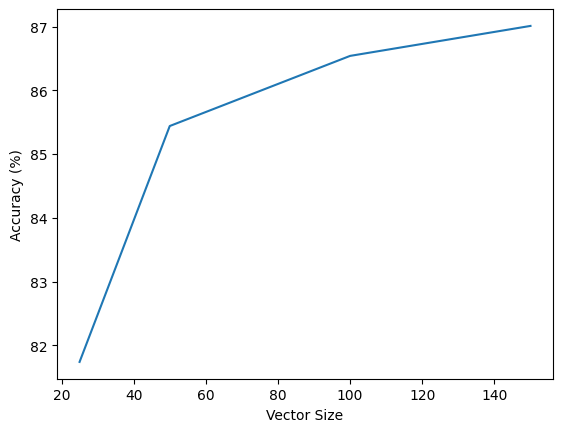

In [61]:
draw_plot("vector" , acy_list_2)

The higher the dimensionality for word vectors, the better the accuracy

### 3. Similarly, vary the window between [2, 3, 5, 10], and answer the same questions as (b).

In [62]:
window_size = [2, 3, 5, 10]
acy_list_3 = []

for ws in window_size:
     acy_list_3.append(w2v_training_and_validate("default",
                                                 ws,
                                                 x_train,
                                                 x_test,
                                                 y_train,
                                                 y_test))

2023-03-13 20:28:49,864 : INFO : collecting all words and their counts
2023-03-13 20:28:49,865 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 20:28:50,227 : INFO : PROGRESS: at sentence #10000, processed 2265451 words, keeping 110850 word types
2023-03-13 20:28:50,577 : INFO : PROGRESS: at sentence #20000, processed 4523323 words, keeping 172403 word types
2023-03-13 20:28:50,944 : INFO : PROGRESS: at sentence #30000, processed 6807809 words, keeping 225435 word types
2023-03-13 20:28:51,329 : INFO : collected 272065 word types from a corpus of 9065729 raw words and 40000 sentences
2023-03-13 20:28:51,329 : INFO : Creating a fresh vocabulary
2023-03-13 20:28:51,593 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 46345 unique words (17.03% of original 272065, drops 225720)', 'datetime': '2023-03-13T20:28:51.593260', 'gensim': '4.3.0', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]',

2023-03-13 20:29:33,626 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=46345, vector_size=100, alpha=0.025>', 'datetime': '2023-03-13T20:29:33.626527', 'gensim': '4.3.0', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-13.2.1-x86_64-i386-64bit', 'event': 'created'}
2023-03-13 20:29:33,627 : WARNING : Effective 'alpha' higher than previous training cycles
2023-03-13 20:29:33,627 : INFO : Word2Vec lifecycle event {'msg': 'training model with 3 workers on 46345 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=2 shrink_windows=True', 'datetime': '2023-03-13T20:29:33.627741', 'gensim': '4.3.0', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-13.2.1-x86_64-i386-64bit', 'event': 'train'}
2023-03-13 20:29:34,634 : INFO : EPOCH 0 - PROGRESS: at 11.77% examples, 786434 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:29:35,645 : INFO :

2023-03-13 20:30:37,139 : INFO : estimated required memory for 46345 words and 100 dimensions: 60248500 bytes
2023-03-13 20:30:37,140 : INFO : resetting layer weights
2023-03-13 20:30:37,159 : INFO : Word2Vec lifecycle event {'update': False, 'trim_rule': 'None', 'datetime': '2023-03-13T20:30:37.159617', 'gensim': '4.3.0', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-13.2.1-x86_64-i386-64bit', 'event': 'build_vocab'}
2023-03-13 20:30:37,160 : INFO : Word2Vec lifecycle event {'msg': 'training model with 3 workers on 46345 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=3 shrink_windows=True', 'datetime': '2023-03-13T20:30:37.160647', 'gensim': '4.3.0', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-13.2.1-x86_64-i386-64bit', 'event': 'train'}
2023-03-13 20:30:38,172 : INFO : EPOCH 0 - PROGRESS: at 9.67% examples, 647537 words/s, in_q

2023-03-13 20:31:30,718 : INFO : EPOCH 0 - PROGRESS: at 9.33% examples, 621866 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:31:31,736 : INFO : EPOCH 0 - PROGRESS: at 19.26% examples, 627523 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:31:32,759 : INFO : EPOCH 0 - PROGRESS: at 29.03% examples, 628164 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:31:33,772 : INFO : EPOCH 0 - PROGRESS: at 38.79% examples, 629595 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:31:34,773 : INFO : EPOCH 0 - PROGRESS: at 48.45% examples, 631180 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:31:35,781 : INFO : EPOCH 0 - PROGRESS: at 58.07% examples, 630099 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:31:36,797 : INFO : EPOCH 0 - PROGRESS: at 67.69% examples, 630581 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:31:37,801 : INFO : EPOCH 0 - PROGRESS: at 77.16% examples, 630977 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:31:38,826 : INFO : EPOCH 0 - PROGRESS: at 86.75% examples, 629201 words/s, in_qsize

2023-03-13 20:32:43,731 : INFO : sample=0.001 downsamples 45 most-common words
2023-03-13 20:32:43,732 : INFO : Word2Vec lifecycle event {'msg': 'downsampling leaves estimated 6605325.885496574 word corpus (75.4%% of prior 8760983)', 'datetime': '2023-03-13T20:32:43.732481', 'gensim': '4.3.0', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-13.2.1-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2023-03-13 20:32:44,074 : INFO : estimated required memory for 46345 words and 100 dimensions: 60248500 bytes
2023-03-13 20:32:44,075 : INFO : resetting layer weights
2023-03-13 20:32:44,093 : INFO : Word2Vec lifecycle event {'update': False, 'trim_rule': 'None', 'datetime': '2023-03-13T20:32:44.093101', 'gensim': '4.3.0', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-13.2.1-x86_64-i386-64bit', 'event': 'build_vocab'}
2023-03-13 20:32:44,093 : INFO : Word2Vec lifecycle even

2023-03-13 20:33:45,512 : INFO : EPOCH 4 - PROGRESS: at 6.33% examples, 421541 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:33:46,516 : INFO : EPOCH 4 - PROGRESS: at 12.73% examples, 424328 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:33:47,517 : INFO : EPOCH 4 - PROGRESS: at 19.46% examples, 428576 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:33:48,525 : INFO : EPOCH 4 - PROGRESS: at 26.18% examples, 429744 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:33:49,526 : INFO : EPOCH 4 - PROGRESS: at 32.85% examples, 432457 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:33:50,537 : INFO : EPOCH 4 - PROGRESS: at 39.42% examples, 431874 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:33:51,539 : INFO : EPOCH 4 - PROGRESS: at 46.16% examples, 433675 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:33:52,543 : INFO : EPOCH 4 - PROGRESS: at 52.31% examples, 429460 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:33:53,567 : INFO : EPOCH 4 - PROGRESS: at 58.69% examples, 427451 words/s, in_qsize

2023-03-13 20:34:46,707 : INFO : EPOCH 3 - PROGRESS: at 6.54% examples, 424850 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:34:47,732 : INFO : EPOCH 3 - PROGRESS: at 13.29% examples, 431804 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:34:48,736 : INFO : EPOCH 3 - PROGRESS: at 20.08% examples, 435735 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:34:49,764 : INFO : EPOCH 3 - PROGRESS: at 26.85% examples, 432808 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:34:50,804 : INFO : EPOCH 3 - PROGRESS: at 33.67% examples, 433053 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:34:51,805 : INFO : EPOCH 3 - PROGRESS: at 40.05% examples, 431851 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:34:52,819 : INFO : EPOCH 3 - PROGRESS: at 46.68% examples, 431843 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:34:53,842 : INFO : EPOCH 3 - PROGRESS: at 53.49% examples, 432224 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:34:54,846 : INFO : EPOCH 3 - PROGRESS: at 60.15% examples, 433219 words/s, in_qsize

2023-03-13 20:35:47,308 : INFO : EPOCH 0 - PROGRESS: at 35.65% examples, 256258 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:35:48,312 : INFO : EPOCH 0 - PROGRESS: at 39.22% examples, 254761 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:35:49,343 : INFO : EPOCH 0 - PROGRESS: at 43.08% examples, 254376 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:35:50,394 : INFO : EPOCH 0 - PROGRESS: at 47.04% examples, 253655 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:35:51,428 : INFO : EPOCH 0 - PROGRESS: at 51.02% examples, 253363 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:35:52,474 : INFO : EPOCH 0 - PROGRESS: at 54.95% examples, 252854 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:35:53,504 : INFO : EPOCH 0 - PROGRESS: at 58.79% examples, 252628 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:35:54,546 : INFO : EPOCH 0 - PROGRESS: at 62.63% examples, 252267 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:35:55,579 : INFO : EPOCH 0 - PROGRESS: at 66.53% examples, 252081 words/s, in_qsiz

2023-03-13 20:37:00,996 : INFO : EPOCH 3 - PROGRESS: at 11.34% examples, 246073 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:37:02,029 : INFO : EPOCH 3 - PROGRESS: at 15.21% examples, 246913 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:37:03,030 : INFO : EPOCH 3 - PROGRESS: at 19.14% examples, 247621 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:37:04,064 : INFO : EPOCH 3 - PROGRESS: at 22.95% examples, 246827 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:37:05,088 : INFO : EPOCH 3 - PROGRESS: at 26.94% examples, 247410 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:37:06,088 : INFO : EPOCH 3 - PROGRESS: at 30.70% examples, 247814 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:37:07,099 : INFO : EPOCH 3 - PROGRESS: at 34.47% examples, 247081 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:37:08,146 : INFO : EPOCH 3 - PROGRESS: at 38.27% examples, 246810 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:37:09,171 : INFO : EPOCH 3 - PROGRESS: at 42.09% examples, 247129 words/s, in_qsiz

2023-03-13 20:38:03,632 : INFO : EPOCH 0 - PROGRESS: at 46.05% examples, 245742 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:38:04,703 : INFO : EPOCH 0 - PROGRESS: at 50.06% examples, 245366 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:38:05,750 : INFO : EPOCH 0 - PROGRESS: at 53.95% examples, 245435 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:38:06,788 : INFO : EPOCH 0 - PROGRESS: at 57.87% examples, 245601 words/s, in_qsize 6, out_qsize 1
2023-03-13 20:38:07,827 : INFO : EPOCH 0 - PROGRESS: at 61.64% examples, 245757 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:38:08,864 : INFO : EPOCH 0 - PROGRESS: at 65.49% examples, 245929 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:38:09,898 : INFO : EPOCH 0 - PROGRESS: at 69.46% examples, 246086 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:38:10,946 : INFO : EPOCH 0 - PROGRESS: at 71.92% examples, 241698 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:38:11,965 : INFO : EPOCH 0 - PROGRESS: at 75.49% examples, 241178 words/s, in_qsiz

2023-03-13 20:39:16,029 : INFO : EPOCH 3 - PROGRESS: at 10.98% examples, 237325 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:39:17,075 : INFO : EPOCH 3 - PROGRESS: at 14.91% examples, 239457 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:39:18,083 : INFO : EPOCH 3 - PROGRESS: at 18.80% examples, 241381 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:39:19,094 : INFO : EPOCH 3 - PROGRESS: at 22.50% examples, 241315 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:39:20,096 : INFO : EPOCH 3 - PROGRESS: at 26.39% examples, 242511 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:39:21,117 : INFO : EPOCH 3 - PROGRESS: at 30.00% examples, 241933 words/s, in_qsize 6, out_qsize 0
2023-03-13 20:39:22,146 : INFO : EPOCH 3 - PROGRESS: at 34.02% examples, 242973 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:39:23,158 : INFO : EPOCH 3 - PROGRESS: at 37.85% examples, 243992 words/s, in_qsize 5, out_qsize 0
2023-03-13 20:39:24,189 : INFO : EPOCH 3 - PROGRESS: at 41.67% examples, 244438 words/s, in_qsiz

#### Accuracy between window sizes

In [63]:
acy_list_3

[[100, 2, 84.87],
 [100, 3, 85.79],
 [100, 5, 86.69],
 [100, 10, 87.42999999999999]]

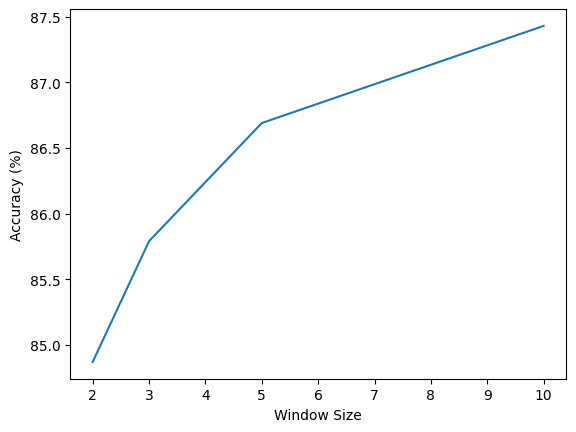

In [64]:
draw_plot("window" , acy_list_3)

The wider the windows are, the better the accuracy we yeild.

## 4. For this part, your downstream model for sentiment analysis will evolve from simple logistic regression to a recurrent neural network architecture. For the Word2Vec embedding model, use the trained model with all default parameters except size, which will be set to 300, for this part. 

### 1.Why would you want to use an RNN for sentiment analysis or text classification tasks instead of models that aren’t neural networks e.g. logistic regression?

Recurrent Neural Networks (RNNs) are particularly well-suited for sentiment analysis and text classification tasks because they can effectively model the sequential nature of natural language. In contrast, traditional models like logistic regression treat each input as an independent variable, ignoring any contextual information or relationships that may exist between adjacent words in a sentence.

One of the main advantages of RNNs is their ability to maintain a memory of previous inputs, which makes them well-suited for modeling time series data, such as natural language text. By doing so, RNNs can capture long-term dependencies and contextual information that traditional models may miss.

Additionally, RNNs can handle variable-length input sequences, which is important for text classification tasks where the length of text can vary greatly. Traditional models require fixed-length inputs, and this often necessitates truncating or padding input sequences to a fixed length, which can result in information loss.

Overall, RNNs are powerful models that can learn complex relationships in text data and produce accurate results in sentiment analysis and text classification tasks. While traditional models like logistic regression have their place in certain applications, they are often outperformed by RNNs in natural language processing tasks due to their ability to capture the sequential nature of language.

### 2.Use Keras to build a neural network classifier. 

### 1.Use the Keras tokenizer and text_to_sequences function to transform each review into an integer sequence. This maps each word to a unique index, which can serve as an identifier. Use pad_sequences with a maximum length corresponding to the longest review to ensure that each input vector into the neural network is of the same length.

In [136]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Embedding
from keras.layers import Input
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM

In [82]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train)
sequences = tokenizer.texts_to_sequences(train)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train))

Found 50000 unique tokens.


In [92]:
### longest sentence
max_length = 0
for sentence in train:
    if len(sentence) > max_length:
        max_length = len(sentence)
        

data = pad_sequences(sequences, maxlen = max_length)

In [160]:
labels = test
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (50000, 2450)
Shape of label tensor: (50000,)


In [161]:
# split the data into a training set and a validation set
x_train , x_test , y_train , y_test = train_test_split(data,
                                                       labels,
                                                       test_size = 0.2)

In [132]:
embeddings_index = {}
f = open('./glove/glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [163]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [162]:
embedding_layer = Embedding(len(word_index) + 1,
                            300,
                            weights = [embedding_matrix],
                            input_length = max_length,
                            trainable = False)

In [ ]:
sequence_input = Input(shape=(max_length,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = LSTM(300)(embedded_sequences)
preds = Dense(1 , activation='sigmoid')(x)

model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.fit(x_train, y_train, validation_data = (x_test , y_test),
          epochs = 10 , batch_size=128)

Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 0.5632 - acc: 0.7137 